# Mutualism (with two species) 

In [1]:
from IPython.display import HTML      # For animation.
from matplotlib import animation      # For animation.
from matplotlib import pyplot as plt  # For plotting.
import numpy as np                    # For solving ODE.
from scipy.integrate import odeint    # For solving ODE.

## Model 

In [13]:
# Parameters.
a = 0.3
b = 0.0011
c = 0.01
d = 0.4
e = 0.01
f = 0.0

t0 = 0.0
t1 = 190.0
y0 = [100, 20]  # Initial population of species 0 and 1.

# Model.
F = lambda y, t: [
    y[0] * (a - b * y[0] - c * y[1]),   # How population 0 changes.
    y[1] * (-d + e * y[0] - f * y[1]),  # How population 1 changes.
]

## Solution 

In [14]:
# Solve ODE.
t = np.linspace(t0, t1, 1000)
y = odeint(F, y0, t)

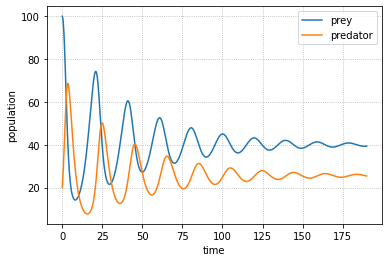

In [15]:
plt.plot(t, y[:, 0], label='prey')
plt.plot(t, y[:, 1], label='predator')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.show()

## Animation 

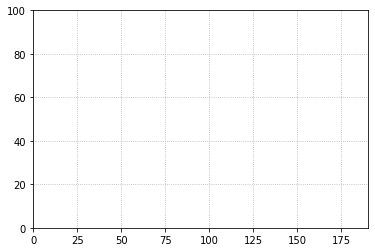

In [5]:
# Same plot, but as an animation.
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
FRAMES = 200

fig, ax = plt.subplots()
ax.grid(linestyle=':')
ax.set_xlim((t0, t1))  # Range of x-axis.
ax.set_ylim((0, 100))  # Range of y-axis.

line0, = ax.plot([], [], lw=2)
line1, = ax.plot([], [], lw=2)

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    return (line0, line1)

def animate(i):
    # Take only first (i/FRAMES) points.
    k = len(t) * i // FRAMES
    line0.set_data(t[:k], y[:k, 0])
    line1.set_data(t[:k], y[:k, 1])
    return (line0, line1)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=50, blit=True)

In [6]:
HTML(anim.to_html5_video())